In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data

In [2]:
# read the data annd transpose it to have the descriptors as column headers 
data = np.genfromtxt('Ontario Covid19 data.csv', delimiter=',', encoding="utf-8-sig", dtype=None).T


# create pandas dataframe
data = pd.DataFrame(data[1:, :], columns=data[0])

# convert "Date" column to datetime objects
data["Date"] = data["Date"].apply(lambda date : datetime.strptime(date, "%m/%d/%Y"))


In [3]:
data

,Date,Number of cases,Change from previous report,Resolved,Deceased,Male,Female,19 and under,20-39,40-59,60-79,80 and over,Total Tested,Currently Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
0,2020-04-22,12879,634,6680,713,5408,7342,284,2914,3945,2909,2816,194745,6757,887,233,185
1,2020-04-21,12245,510,6221,659,5169,6952,270,2781,3798,2778,2609,184531,6845,878,243,192
2,2020-04-20,11735,551,5806,622,4955,6663,260,2657,3665,2687,2457,174170,5546,859,250,194
3,2020-04-19,11184,606,5515,584,4728,6354,248,2525,3502,2580,2312,164840,3799,802,247,193
4,2020-04-18,10578,568,5209,553,4495,5996,235,2408,3354,2437,2135,156097,5736,809,247,196
5,2020-04-17,10010,485,4875,514,4277,5658,223,2269,3201,2313,1996,146454,6833,828,250,197
6,2020-04-16,9525,564,4556,478,4074,5380,210,2164,3067,2214,1864,136992,5993,829,245,200
7,2020-04-15,8961,514,4194,423,3855,5046,204,2091,2929,2093,1639,128093,4323,807,248,200
8,2020-04-14,8447,494,3902,385,3679,4720,192,1997,2794,1989,1470,119092,6010,795,254,188
9,2020-04-13,7953,483,3568,334,3511,4393,182,1912,2676,1890,1287,113082,2107,769,255,199


# Cases in Ontario

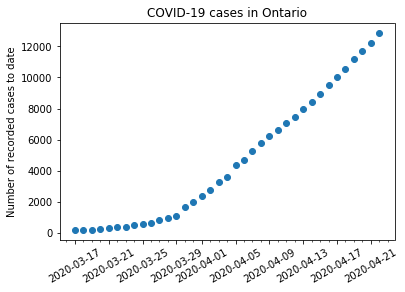

In [4]:
date = data["Date"].tolist()
cases = data["Number of cases"].astype(float).tolist()

fig, ax = plt.subplots()
plt.plot_date(date, cases)

days = mdates.DayLocator()  # every day
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("COVID-19 cases in Ontario")
plt.ylabel("Number of recorded cases to date")
plt.show()

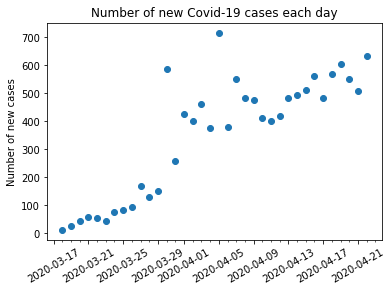

In [5]:
daily_cases = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    daily_cases[i] = cases[i] - cases[i+1]


fig, ax = plt.subplots()
plt.plot_date(date[:-1], daily_cases)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Number of new Covid-19 cases each day")
plt.ylabel("Number of new cases")
plt.show()

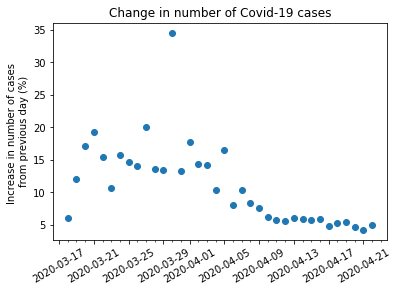

In [6]:
case_change = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    case_change[i] = 100*(cases[i] - cases[i+1])/cases[i]


fig, ax = plt.subplots()
plt.plot_date(date[:-1], case_change)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Change in number of Covid-19 cases")
plt.ylabel("Increase in number of cases \nfrom previous day (%)")
plt.show()

# Deaths in Ontario

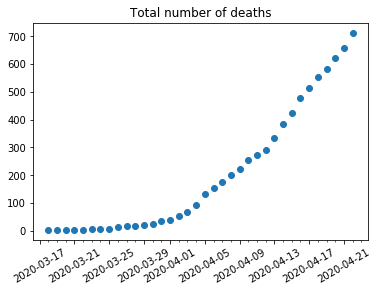

In [7]:
date = data["Date"].tolist()[:-1]
deaths = data["Deceased"][:-1].astype(float).tolist()
fig, ax = plt.subplots()
plt.plot_date(date, deaths)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Total number of deaths")
plt.show()

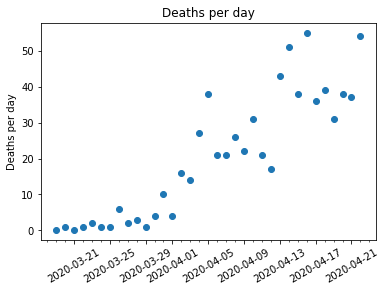

In [8]:
daily_deaths = np.zeros(len(deaths)-1)
for i in range(len(deaths)-1):
    daily_deaths[i] = deaths[i] - deaths[i+1]

fig, ax = plt.subplots()
plt.plot_date(date[:-1], daily_deaths[:])
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title("Deaths per day")
plt.ylabel("Deaths per day")
plt.show()

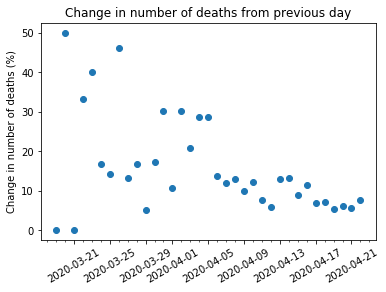

In [9]:
death_change = np.zeros(len(deaths)-1)
for i in range(len(deaths)-1):
    death_change[i] = 100*(deaths[i] - deaths[i+1])/deaths[i]

fig, ax = plt.subplots()
plt.plot_date(date[:-1], death_change[:])
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title("Change in number of deaths from previous day")
plt.ylabel("Change in number of deaths (%)")
plt.show()

# Daily Changes

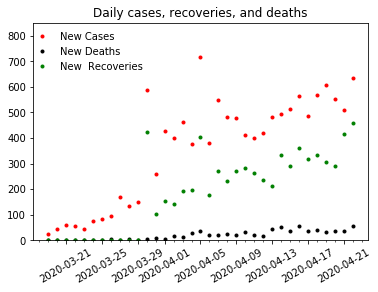

In [10]:
date = data["Date"].tolist()
recoveries = data["Resolved"].astype(float).tolist()

daily_recoveries = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    daily_recoveries[i] = recoveries[i] - recoveries[i+1]


fig, ax = plt.subplots()
plt.plot_date(date[:-2], daily_cases[:-1], "r.", label="New Cases")
plt.plot_date(date[:-2], daily_deaths, "k.", label="New Deaths")
plt.plot_date(date[:-2], daily_recoveries[:-1], "g.", label="New  Recoveries")
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Daily cases, recoveries, and deaths")
plt.legend(loc="upper left", framealpha=0, bbox_to_anchor=(-0.03,1))
plt.ylim([0,850])
plt.show()

# Active cases

In [11]:
# create dataframe with required information (convert from int to string, and remove the row with no death information)
last_index = len(data["Date"]) - 1
data2 = data[["Number of cases", "Resolved", "Deceased"]].copy().drop([last_index]).astype(int)

# add date information
data2["Date"] = data["Date"].drop([last_index])

# Create column of active cases (total - deaths - resolved)
data2["Active cases"] = data2["Number of cases"] - data2["Resolved"] - data2["Deceased"]

# rearanging columns
data2 = data2[["Date", "Number of cases", "Resolved", "Deceased", "Active cases"]]


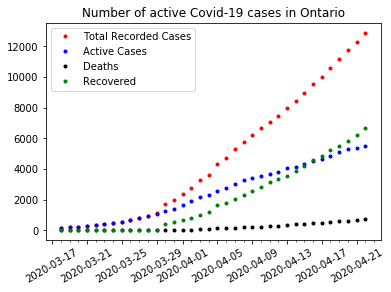

In [12]:
date2 = data2["Date"].tolist()
active = data2["Active cases"].tolist()
cases2 = data2["Number of cases"].tolist()
deaths = data2["Deceased"].tolist()
resolved = data2["Resolved"].tolist()

# plotting
fig, ax = plt.subplots()
ax.plot_date(date2, cases2, 'r.', label="Total Recorded Cases")
ax.plot_date(date2, active, 'b.', label='Active Cases')
ax.plot_date(date2, deaths, 'k.', label="Deaths")
ax.plot_date(date2, resolved, 'g.', label="Recovered")

ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Number of active Covid-19 cases in Ontario")
ax.legend(loc="upper left")
plt.show()

# Testing

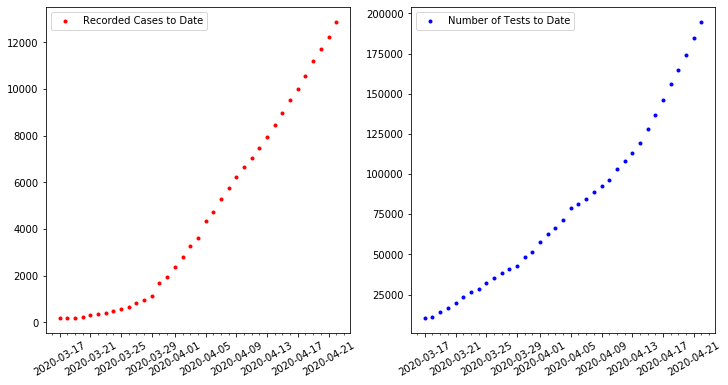

In [13]:
all_dates = data["Date"].tolist()
cases = data["Number of cases"].astype(float).tolist()
tests = data["Total Tested"].astype(float).tolist()


# plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.plot_date(all_dates, cases, 'r.', label="Recorded Cases to Date")
ax1.legend(loc="upper left")
ax2.plot_date(all_dates, tests, 'b.', label='Number of Tests to Date')
ax2.legend(loc="upper left")
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.set_minor_locator(days)
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()


# Hospitalizations

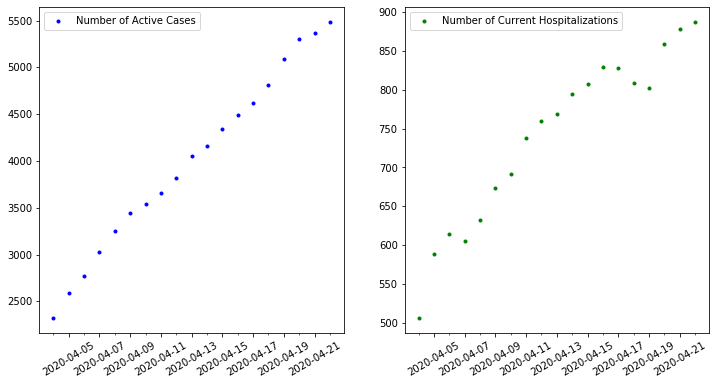

In [14]:
# index of day before hospitalization data was included (April 3rd)
first_day_index = data["Date"].tolist().index(datetime.strptime("04/03/2020", "%m/%d/%Y"))
hospitalizations = data["Number of patients hospitalized with COVID-19"][:first_day_index].astype(float).tolist()

# plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.plot_date(all_dates[0:first_day_index], active[0:first_day_index], 'b.', label="Number of Active Cases")
ax1.legend(loc="upper left")
ax2.plot_date(all_dates[0:first_day_index], hospitalizations, 'g.', label="Number of Current Hospitalizations")
ax2.legend(loc="upper left")
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.set_minor_locator(days)
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()